In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import alpaca_trade_api as tradeapi

# Makes output higher resolution.
%config InlineBackend.figure_format = 'retina'

/Users/sam/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [6]:
# Paper trade log-in
api = tradeapi.REST('APIKEY',
                    'SECRETCODE', 
                    'https://paper-api.alpaca.markets')

In [7]:
def get_bars(symbol):
    
    data = api.get_barset(symbol, 'day', limit=1000)
    data = data.df[symbol]['close']

    return data

In [8]:
def correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:   
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
            
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = df.corr().sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [70]:
# Make orders

# api.submit_order('SNAP', 100, 'buy', 'market', 'day')
# api.submit_order('SLV', 100, 'buy', 'market', 'day')
# api.submit_order('JNJ', 100, 'buy', 'market', 'day')
# api.submit_order('AAPL', 10, 'buy', 'market', 'day')
# api.submit_order('GLD', 100, 'buy', 'market', 'day')
# api.submit_order('GOOG', 1, 'buy', 'market', 'day')
# api.submit_order('CAT', 100, 'buy', 'market', 'day')
# api.submit_order('EWZ', 10, 'buy', 'market', 'day')

In [10]:
pos_list = [x.symbol for x in api.list_positions()]

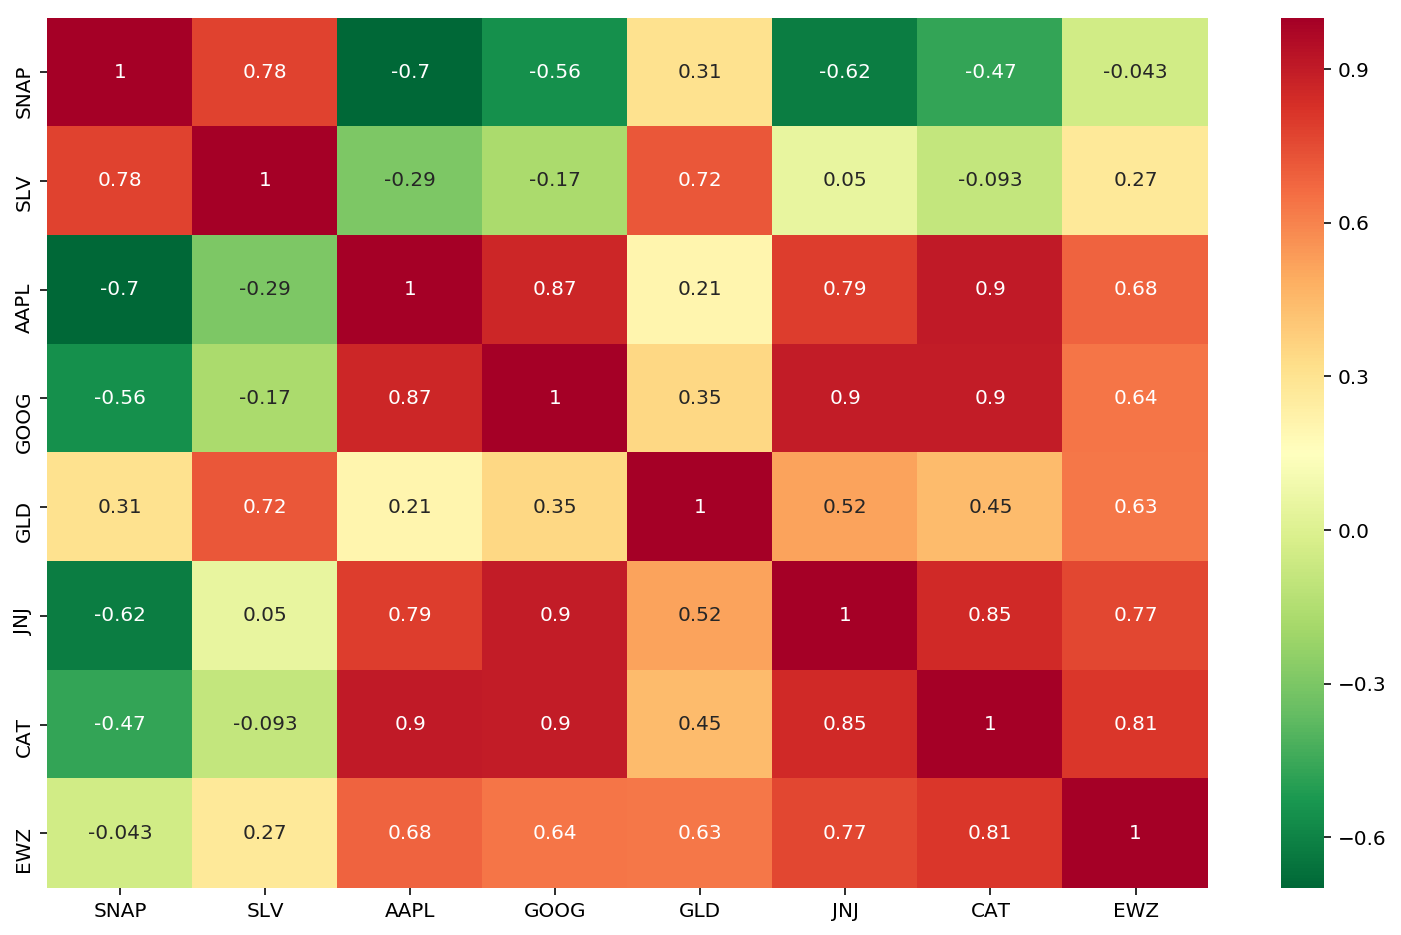

In [12]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(13,8))
sns.heatmap(correlation(pos_list), 
            annot=True, 
            cmap="RdYlGn_r");

In [ ]:
# Best:
#     cmap="RdYlGn_r"
#     cmap='summer_r'
#     cmap="Blues"
#     cmap="Greens"

# Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
#     CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, 
#     PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
#     PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, 
#     RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
#     Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, 
#     autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, 
#     cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, 
#     gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
#     gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, 
#     gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, 
#     magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, 
#     plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, 
#     summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
#     twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [13]:
# Bonus code: compare sorting by "absolute" correlation coef sums.

def abs_correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:   
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
            
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = abs(df.corr()).sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [15]:
pos_list = ['SNAP', 'SLV', 'JNJ', 'GOOG', 
            'GLD', 'EWZ', 'CAT', 'AAPL', 
            'USO', 'AAL', 'QQQ', 'AMZN', 
            'MMM', 'JNK', 'TLT', 'GS']

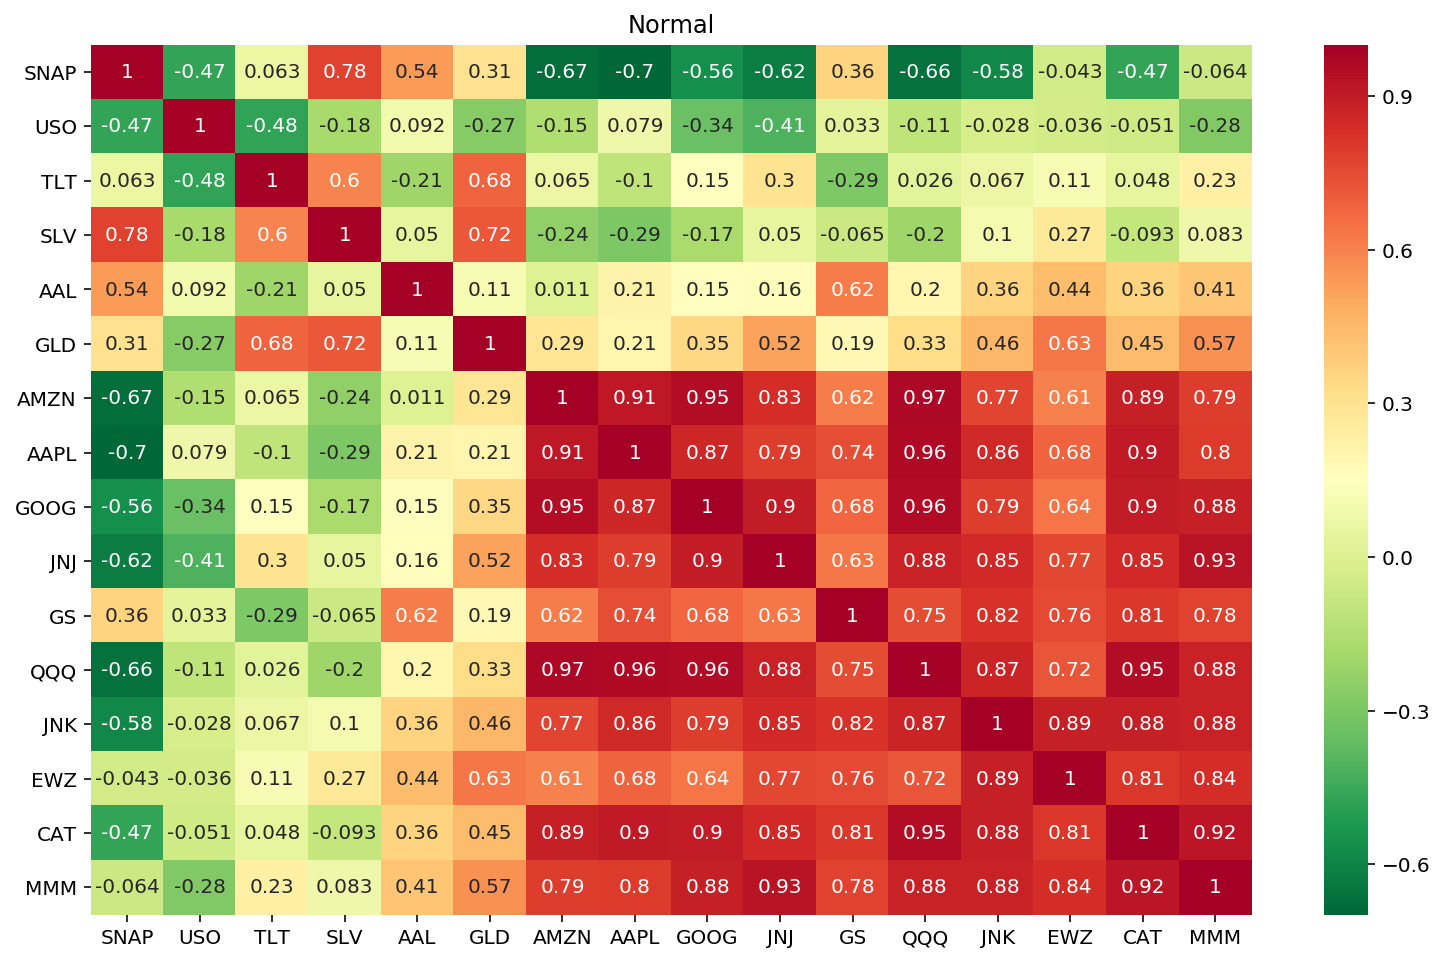

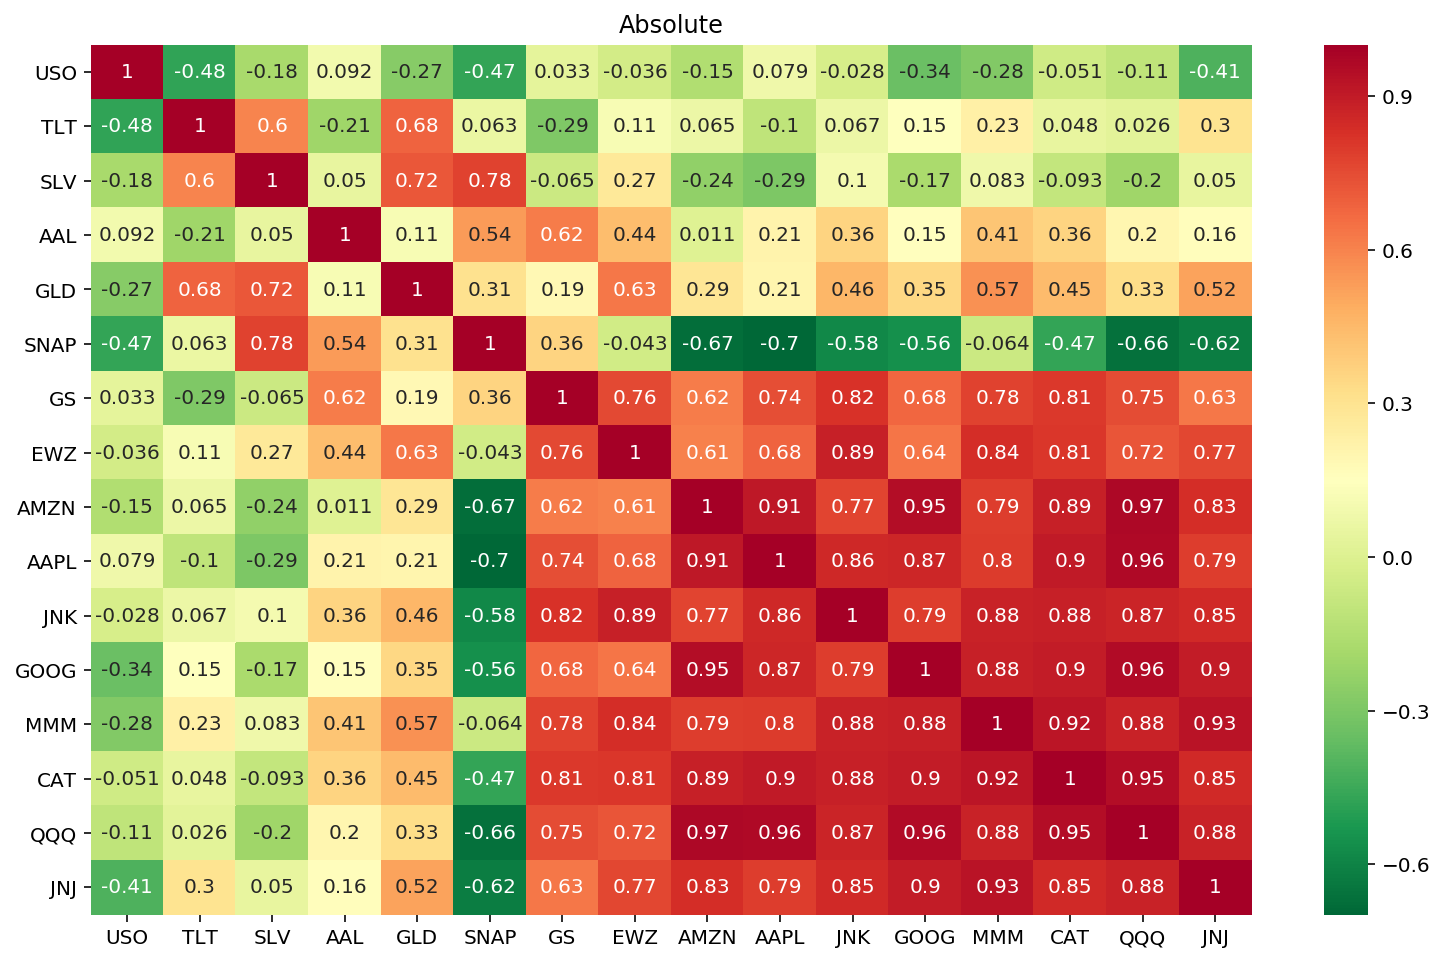

In [16]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(13,8))
plt.title('Normal')
sns.heatmap(correlation(pos_list), annot=True, cmap="RdYlGn_r");

plt.figure(figsize=(13,8))
plt.title('Absolute')
sns.heatmap(abs_correlation(pos_list), annot=True, cmap="RdYlGn_r");

In [20]:
# Bonus code: for each symbol, get the top three least correlated symbols from S&P100

def get_top_three(equity_list):
    
    # Add equity list to Universe
    all_sym = Universe.extend([x for x in equity_list if x not in Universe])
    
    # Get all correlations
    correlation_df = correlation(Universe)
    
    least_corr_sym = []
    least_corr_coef = []
    
    for symbol in equity_list:

        top_three = abs(correlation_df[symbol]).sort_values(ascending=True).head(3)

        for item in zip(top_three.index, top_three):

            index_tuple = (symbol, item[0])
            least_corr_sym.append(index_tuple)
            least_corr_coef.append(item[1])

    top_three_df = pd.DataFrame(
        least_corr_coef,
        index = pd.MultiIndex.from_tuples(least_corr_sym, names=('Symbol', 'Least correlation')),
        columns=['CC']
    )
    
    return top_three_df

In [18]:
# S&P 100
Universe = ['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'ALGN', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 
            'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BKNG', 'BMRN', 'CA', 'CDNS', 'CELG', 'CERN', 
            'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'CTRP', 'CTSH', 'CTXS', 'DISH', 
            'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 
            'GOOG', 'GOOGL', 'HAS', 'HOLX', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 
            'JBHT', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MELI', 
            'MNST', 'MSFT', 'MU', 'MXIM', 'MYL', 'NFLX', 'NTES', 'NVDA', 'ORLY', 'PAYX', 'PCAR', 
            'PYPL', 'QCOM', 'QRTEA', 'REGN', 'ROST', 'SBUX', 'SHPG', 'SIRI', 'SNPS', 'STX', 'SWKS',
            'SYMC', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'ULTA', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDAY', 
            'WDC', 'WYNN', 'XLNX', 'XRAY']

In [19]:
top_three = get_top_three(pos_list)
top_three

Exception with CA


CC
Symbol Least correlation          
SNAP   ULTA               0.002092
       EA                 0.007389
       ALXN               0.016352
SLV    KLAC               0.002419
       MDLZ               0.002554
       SWKS               0.002937
JNJ    CERN               0.027440
       SLV                0.049631
       WDC                0.082202
GOOG   CERN               0.038932
       WDC                0.093038
       ESRX               0.142012
GLD    SBUX               0.003905
       FOX                0.011564
       FOXA               0.016516
EWZ    INCY               0.005085
       HSIC               0.009218
       KHC                0.010160
CAT    BIIB               0.042625
       TLT                0.048318
       USO                0.051453
AAPL   HSIC               0.002739
       USO                0.078896
       CTRP               0.088311
USO    PCAR               0.006592
       MAR                0.009105
       WBA                0.013875
AAL    AMZN               0.010702
       ALXN               0.013288
       ROST               0.015789
QQQ    ESRX               0.006424
       BIIB               0.014661
       TLT                0.026101
AMZN   AAL                0.010702
       WDC                0.041598
       CERN               0.063597
MMM    VOD                0.015926
       XRAY               0.035103
       SNAP               0.064394
JNK    INCY               0.020226
       USO                0.027670
       TLT                0.066756
TLT    ADI                0.000955
       WDAY               0.004469
       CSCO               0.010338
GS     VOD                0.004161
       ORLY               0.007897
       USO                0.033236